In [1]:
#TODO 決定木分析
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
import japanize_matplotlib
bc = load_breast_cancer(as_frame=True)

In [2]:
#テストデータと学習データの分割
x_train,x_test,y_train,y_test=train_test_split(
    bc.data,
    bc.target,
    test_size=0.3,
    random_state = 0
)

In [ ]:
model_tree_c = DecisionTreeClassifier(
    criterion='gini',
    max_depth=2,
    min_samples_split=10,
)

In [4]:
model_tree_c.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,10
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [5]:
print("予測データ",model_tree_c.predict(x_test))
print("正解データ",np.array(y_test))

予測データ [0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0
 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 1]
正解データ [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0
 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1]


In [6]:
print(model_tree_c.score(x_test,y_test))


0.935672514619883


[Text(0.5, 0.8333333333333334, 'worst concave points <= 0.142\ngini = 0.468\nsamples = 398\nvalue = [149, 249]\nclass = benign'),
 Text(0.25, 0.5, 'worst radius <= 17.615\ngini = 0.147\nsamples = 263\nvalue = [21, 242]\nclass = benign'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.077\nsamples = 250\nvalue = [10, 240]\nclass = benign'),
 Text(0.375, 0.16666666666666666, 'gini = 0.26\nsamples = 13\nvalue = [11, 2]\nclass = malignant'),
 Text(0.75, 0.5, 'area error <= 13.93\ngini = 0.098\nsamples = 135\nvalue = [128, 7]\nclass = malignant'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = benign'),
 Text(0.875, 0.16666666666666666, 'gini = 0.059\nsamples = 132\nvalue = [128, 4]\nclass = malignant')]

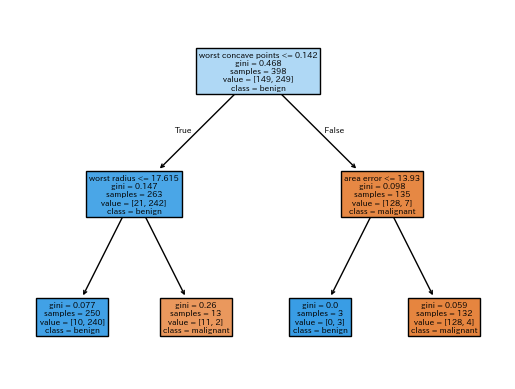

In [7]:
plot_tree(
    model_tree_c,
    feature_names=bc.feature_names,
    class_names=bc.target_names,
    filled=True
)


In [8]:
#ランダムフォレスト
model_forest = RandomForestClassifier(
    n_estimators=100,
    max_depth=3,
    max_features=5,
    random_state=0
    
)

In [9]:
model_forest.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,5
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [10]:
print("予測値",model_forest.predict(x_test))
print("正解値",np.array(y_test))

予測値 [0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1
 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0
 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1]
正解値 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0
 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1]


In [11]:
print(model_forest.score(x_test,y_test))

0.9532163742690059


In [12]:
#ジニ不純度の減少量から算出
forest_importances = pd.DataFrame(
    model_forest.feature_importances_,
    index=bc.feature_names,
    columns=['重要度']
).sort_values('重要度',ascending=False)
forest_importances

,重要度
worst perimeter,0.163678
worst concave points,0.150038
mean concave points,0.136197
worst radius,0.103167
mean concavity,0.093138
mean perimeter,0.066447
worst area,0.050634
mean area,0.039999
worst concavity,0.031625
radius error,0.025128


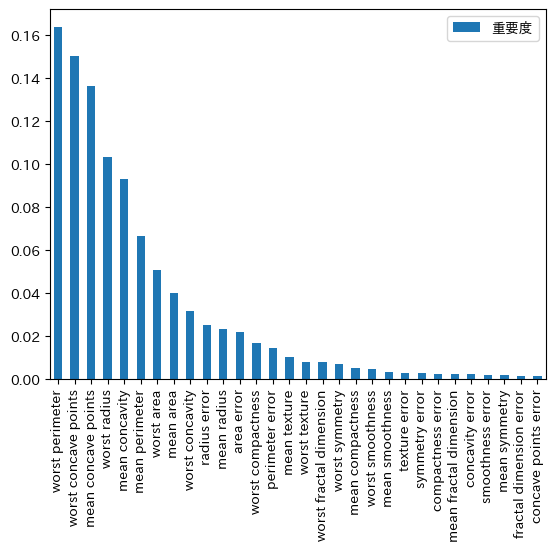

In [13]:
forest_importances.plot.bar()
plt.show()

In [14]:
importance = permutation_importance(
    model_forest,
    x_test,
    y_test,
    n_repeats=10,
    random_state=0
)

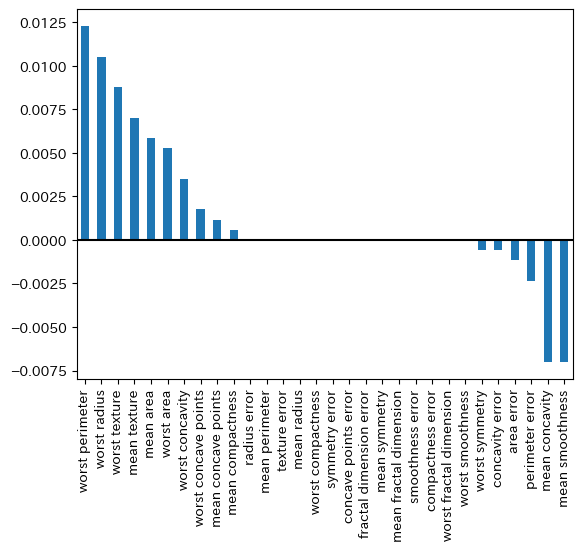

In [15]:
forest_pfi = pd.Series(
    importance.importances_mean,
    index = bc.feature_names
).sort_values(ascending=False)

forest_pfi.plot.bar()
plt.axhline(y=0,color='black')